In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore') 

## Problem statement

In the fast-paced taxi booking sector, making the most of revenue is essential for long-term success and driver happiness.
Our goal is to use data-driven insights to maximise revenue streams for taxi drivers in order to meet this need.
Our research aims to determine whether payment methods have an impact on fare pricing by focusing on the relationship between payment type and fare amount.

# Loading the Dataset

In [138]:
df = pd.read_csv('/Users/dhruvpatel/Documents/Maximizing revenue project/yellow_tripdata_2020_01.csv')

In [139]:
df

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01T00:28:15,2020-01-01T00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.00,3.00,0.5,1.47,0.00,0.3,11.27,2.5
1,1.0,2020-01-01T00:35:39,2020-01-01T00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.00,3.00,0.5,1.50,0.00,0.3,12.30,2.5
2,1.0,2020-01-01T00:47:41,2020-01-01T00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.00,3.00,0.5,1.00,0.00,0.3,10.80,2.5
3,1.0,2020-01-01T00:55:23,2020-01-01T01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.50,0.50,0.5,1.36,0.00,0.3,8.16,0.0
4,2.0,2020-01-01T00:01:58,2020-01-01T00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.50,0.50,0.5,0.00,0.00,0.3,4.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405003,NaN,2020-01-31T22:51:00,2020-01-31T23:22:00,NaN,3.24,NaN,NaN,237,234,NaN,17.59,2.75,0.5,0.00,0.00,0.3,21.14,0.0
6405004,NaN,2020-01-31T22:10:00,2020-01-31T23:26:00,NaN,22.13,NaN,NaN,259,45,NaN,46.67,2.75,0.5,0.00,12.24,0.3,62.46,0.0
6405005,NaN,2020-01-31T22:50:07,2020-01-31T23:17:57,NaN,10.51,NaN,NaN,137,169,NaN,48.85,2.75,0.0,0.00,0.00,0.3,51.90,0.0
6405006,NaN,2020-01-31T22:25:53,2020-01-31T22:48:32,NaN,5.49,NaN,NaN,50,42,NaN,27.17,2.75,0.0,0.00,0.00,0.3,30.22,0.0


In [142]:
df.describe()

,vendorid,passenger_count,trip_distance,ratecodeid,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,6.339567e+06,6.339567e+06,6.405008e+06,6.339567e+06,6.405008e+06,6.405008e+06,6.339567e+06,6.405008e+06,6.405008e+06,6.405008e+06,6.405008e+06,6.405008e+06,6.405008e+06,6.405008e+06,6.405008e+06
mean,1.669624e+00,1.515333e+00,2.929644e+00,1.059908e+00,1.647323e+02,1.626627e+02,1.270298e+00,1.269411e+01,1.115456e+00,4.923182e-01,2.189342e+00,3.488395e-01,2.979870e-01,1.866315e+01,2.275662e+00
std,4.703484e-01,1.151594e+00,8.315911e+01,8.118432e-01,6.554374e+01,6.991261e+01,4.739985e-01,1.212730e+01,1.260054e+00,7.374184e-02,2.760028e+00,1.766978e+00,3.385937e-02,1.475736e+01,7.352646e-01
min,1.000000e+00,0.000000e+00,-3.062000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-1.238000e+03,-2.700000e+01,-5.000000e-01,-9.100000e+01,-3.574000e+01,-3.000000e-01,-1.242300e+03,-2.500000e+00
25%,1.000000e+00,1.000000e+00,9.600000e-01,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.116000e+01,2.500000e+00
50%,2.000000e+00,1.000000e+00,1.600000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.000000e+00,5.000000e-01,5.000000e-01,1.950000e+00,0.000000e+00,3.000000e-01,1.430000e+01,2.500000e+00
75%,2.000000e+00,2.000000e+00,2.930000e+00,1.000000e+00,2.340000e+02,2.340000e+02,2.000000e+00,1.400000e+01,2.500000e+00,5.000000e-01,2.860000e+00,0.000000e+00,3.000000e-01,1.980000e+01,2.500000e+00
max,2.000000e+00,9.000000e+00,2.102401e+05,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,4.265000e+03,1.130100e+02,3.080000e+01,1.100000e+03,9.105000e+02,3.000000e-01,4.268300e+03,2.750000e+00


In [144]:
df.isnull().sum()

vendorid                 65441
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          65441
trip_distance                0
ratecodeid               65441
store_and_fwd_flag       65441
pulocationid                 0
dolocationid                 0
payment_type             65441
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge         0
dtype: int64

# Exploratory data analysis

In [146]:
df.shape

(6405008, 18)

In [148]:
df.dtypes

vendorid                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
ratecodeid               float64
store_and_fwd_flag        object
pulocationid               int64
dolocationid               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

In [150]:
df['tpep_pickup_datetime']=pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime']=pd.to_datetime(df['tpep_dropoff_datetime'])

In [152]:
df.dtypes

vendorid                        float64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
ratecodeid                      float64
store_and_fwd_flag               object
pulocationid                      int64
dolocationid                      int64
payment_type                    float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
dtype: object

In [154]:
df['duration']= df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
df['duration'] =df['duration'].dt.total_seconds()/60

In [156]:
df.head()

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,4.800000
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,7.416667
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5,6.183333
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0,4.850000
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0,2.300000


In [158]:
 df = df[['passenger_count','payment_type','fare_amount','trip_distance','duration']]

In [160]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,1.0,6.00,1.20,4.800000
1,1.0,1.0,7.00,1.20,7.416667
2,1.0,1.0,6.00,0.60,6.183333
3,1.0,1.0,5.50,0.80,4.850000
4,1.0,2.0,3.50,0.00,2.300000
...,...,...,...,...,...
6405003,NaN,NaN,17.59,3.24,31.000000
6405004,NaN,NaN,46.67,22.13,76.000000
6405005,NaN,NaN,48.85,10.51,27.833333
6405006,NaN,NaN,27.17,5.49,22.650000


In [162]:
 df.isnull().sum()


passenger_count    65441
payment_type       65441
fare_amount            0
trip_distance          0
duration               0
dtype: int64

In [164]:
(65441/len(df))*100

1.021716132126611

As the missing value is 1% so we can drop the data

In [166]:
df.dropna(inplace= True)

In [168]:
df.isnull().sum()

passenger_count    0
payment_type       0
fare_amount        0
trip_distance      0
duration           0
dtype: int64

In [170]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,1.0,6.0,1.20,4.800000
1,1.0,1.0,7.0,1.20,7.416667
2,1.0,1.0,6.0,0.60,6.183333
3,1.0,1.0,5.5,0.80,4.850000
4,1.0,2.0,3.5,0.00,2.300000
...,...,...,...,...,...
6339562,1.0,1.0,11.0,2.10,14.233333
6339563,1.0,1.0,13.0,2.13,19.000000
6339564,1.0,1.0,12.5,2.55,16.283333
6339565,1.0,2.0,8.5,1.61,9.633333


In [172]:
df['passenger_count']=df['passenger_count'].astype('int64')
df['payment_type']=df['payment_type'].astype('int64')

In [174]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,1,6.0,1.20,4.800000
1,1,1,7.0,1.20,7.416667
2,1,1,6.0,0.60,6.183333
3,1,1,5.5,0.80,4.850000
4,1,2,3.5,0.00,2.300000
...,...,...,...,...,...
6339562,1,1,11.0,2.10,14.233333
6339563,1,1,13.0,2.13,19.000000
6339564,1,1,12.5,2.55,16.283333
6339565,1,2,8.5,1.61,9.633333


In [176]:
df[df.duplicated()]

,passenger_count,payment_type,fare_amount,trip_distance,duration
2056,1,2,7.0,0.00,0.000000
2441,1,1,52.0,0.00,0.200000
2446,2,1,9.5,1.70,13.066667
2465,1,1,4.0,0.40,3.083333
3344,1,1,6.0,1.20,5.350000
...,...,...,...,...,...
6339558,1,2,8.0,1.63,8.800000
6339559,1,1,8.5,1.81,8.016667
6339560,1,2,6.5,0.98,6.900000
6339562,1,1,11.0,2.10,14.233333


Removed the duplicate data

In [178]:
df.drop_duplicates(inplace = True)


In [180]:
df['passenger_count'].value_counts(normalize = True)

passenger_count
1    0.581981
2    0.190350
3    0.066360
5    0.062937
6    0.039272
4    0.036046
0    0.023033
7    0.000009
9    0.000006
8    0.000006
Name: proportion, dtype: float64

In [182]:
df['payment_type'].value_counts(normalize = True)

payment_type
1    6.782670e-01
2    3.075731e-01
3    8.721480e-03
4    5.438084e-03
5    3.324622e-07
Name: proportion, dtype: float64

In [184]:
print(df['payment_type'].dtype)


int64


In [186]:
# Filter rows where payment_type < 3
df = df[df['payment_type'] < 3]

# Filter rows where passenger_count is between 0 and 6
df = df[(df['passenger_count'] > 0) & (df['passenger_count'] < 6)]

In [188]:
df.shape

(2780283, 5)

In [190]:
df['payment_type'].replace([1,2],['Card','Cash'],inplace=True)

In [192]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,Card,6.0,1.20,4.800000
1,1,Card,7.0,1.20,7.416667
2,1,Card,6.0,0.60,6.183333
3,1,Card,5.5,0.80,4.850000
4,1,Cash,3.5,0.00,2.300000
...,...,...,...,...,...
6339555,3,Card,10.0,2.09,14.800000
6339561,1,Card,17.5,4.11,21.500000
6339563,1,Card,13.0,2.13,19.000000
6339564,1,Card,12.5,2.55,16.283333


In [194]:
df.describe()

,passenger_count,fare_amount,trip_distance,duration
count,2.780283e+06,2.780283e+06,2.780283e+06,2.780283e+06
mean,1.733386e+00,1.780567e+01,4.536729e+00,2.415478e+01
std,1.176652e+00,1.506997e+01,4.895890e+00,9.260031e+01
min,1.000000e+00,-5.000000e+02,-2.218000e+01,-2.770367e+03
25%,1.000000e+00,9.000000e+00,1.500000e+00,9.883333e+00
50%,1.000000e+00,1.300000e+01,2.730000e+00,1.573333e+01
75%,2.000000e+00,2.100000e+01,5.470000e+00,2.336667e+01
max,5.000000e+00,4.265000e+03,2.628800e+02,8.525117e+03


Remove the negative value as seen in min

In [196]:
df=df[df['fare_amount']>0]
df=df[df['trip_distance']>0]
df=df[df['duration']>0]

In [198]:
df.describe()

,passenger_count,fare_amount,trip_distance,duration
count,2.748932e+06,2.748932e+06,2.748932e+06,2.748932e+06
mean,1.738151e+00,1.766835e+01,4.583313e+00,2.418261e+01
std,1.179440e+00,1.447531e+01,4.897806e+00,9.272285e+01
min,1.000000e+00,1.000000e-02,1.000000e-02,1.666667e-02
25%,1.000000e+00,9.000000e+00,1.530000e+00,9.950000e+00
50%,1.000000e+00,1.300000e+01,2.770000e+00,1.575000e+01
75%,2.000000e+00,2.100000e+01,5.500000e+00,2.333333e+01
max,5.000000e+00,4.265000e+03,2.628800e+02,8.525117e+03


All values are in positive

removing the other outliers techniques

{'whiskers': [<matplotlib.lines.Line2D at 0x165c53b90>,
 'caps': [<matplotlib.lines.Line2D at 0x30a560950>,
 'boxes': [<matplotlib.lines.Line2D at 0x165c534a0>],
 'medians': [<matplotlib.lines.Line2D at 0x30a54daf0>],
 'fliers': [<matplotlib.lines.Line2D at 0x30a54f170>],
 'means': []}

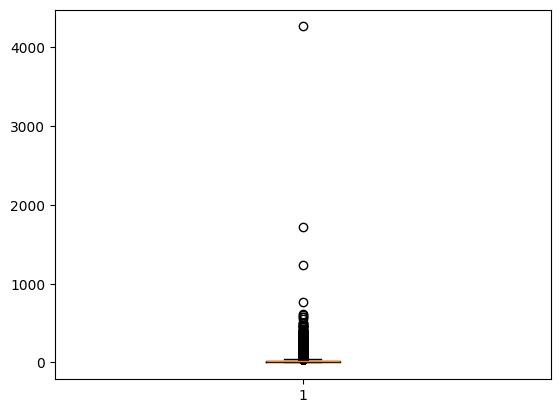

In [200]:
plt.boxplot(df['fare_amount'])

 There are few outlier and we can remove by inter quatile range

In [202]:
for col in ['fare_amount','trip_distance','duration']:
    q1= df[col].quantile(0.25)
    q3= df[col].quantile(0.75)
    IQR= q3 - q1
    Lower_bound = q1 - 1.5 * IQR
    Upper_bound = q3 + 1.5 * IQR 

    
    df = df[(df[col]>= Lower_bound) & (df[col]<= Upper_bound)]
  
    

In [204]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,Card,6.0,1.20,4.800000
1,1,Card,7.0,1.20,7.416667
2,1,Card,6.0,0.60,6.183333
3,1,Card,5.5,0.80,4.850000
5,1,Cash,2.5,0.03,0.883333
...,...,...,...,...,...
6339550,4,Card,10.5,2.40,12.383333
6339555,3,Card,10.0,2.09,14.800000
6339561,1,Card,17.5,4.11,21.500000
6339563,1,Card,13.0,2.13,19.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x15611af00>,
 'caps': [<matplotlib.lines.Line2D at 0x15611b3b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x15611ac60>],
 'medians': [<matplotlib.lines.Line2D at 0x15611b980>],
 'fliers': [<matplotlib.lines.Line2D at 0x15611bc20>],
 'means': []}

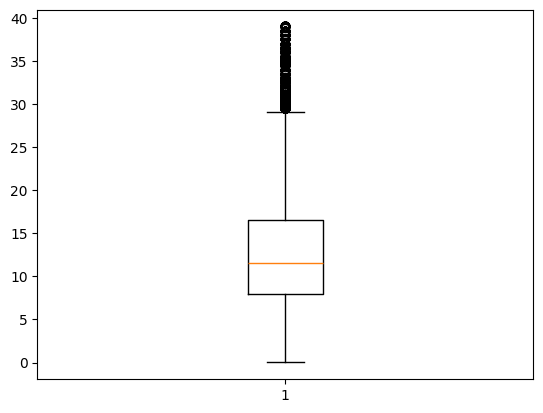

In [206]:
plt.boxplot(df['fare_amount'])

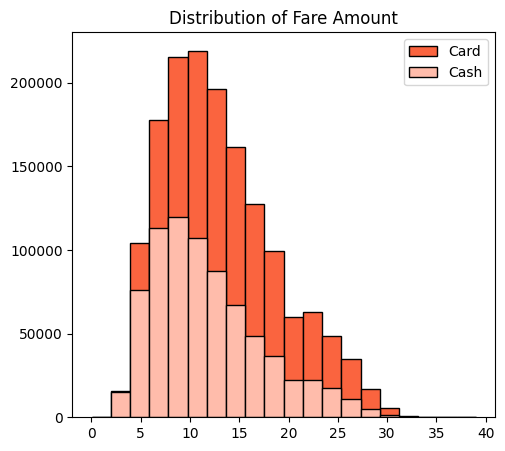

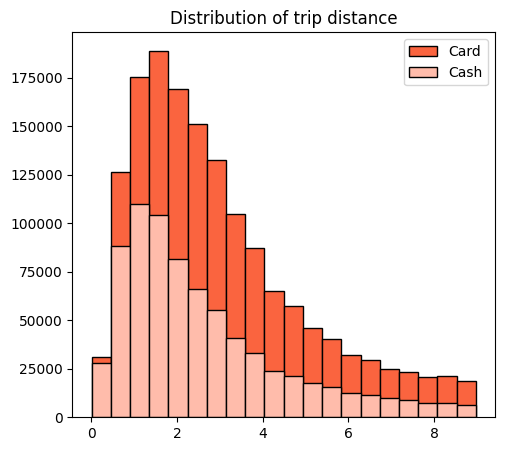

In [208]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1) 
plt.title('Distribution of Fare Amount')
plt.hist(df[df['payment_type']=='Card']['fare_amount'],histtype='barstacked', bins=20, edgecolor='k', color= '#FA643F', label = 'Card')
plt.hist(df[df['payment_type']=='Cash']['fare_amount'],histtype='barstacked', bins=20, edgecolor='k', color= '#FFBCAB', label = 'Cash')
plt.legend()
plt.show()

plt.figure(figsize=(12,5))
plt.subplot(1,2,1) 
plt.title('Distribution of trip distance')
plt.hist(df[df['payment_type']=='Card']['trip_distance'],histtype='barstacked', bins=20, edgecolor='k', color= '#FA643F', label = 'Card')
plt.hist(df[df['payment_type']=='Cash']['trip_distance'],histtype='barstacked', bins=20, edgecolor='k', color= '#FFBCAB', label = 'Cash')
plt.legend()
plt.show()

In [210]:
df.groupby('payment_type').agg({'fare_amount':['mean','std'],'trip_distance':['mean','std']})

fare_amount           trip_distance         
                    mean       std          mean      std
payment_type                                             
Card           13.112493  5.849281      2.992237  1.99274
Cash           11.758005  5.613038      2.602207  1.91372

In [214]:
print(df.columns)

Index(['passenger_count', 'payment_type', 'fare_amount', 'trip_distance',
       'duration'],
      dtype='object')


([<matplotlib.patches.Wedge at 0x156e0fe60>,
 [Text(-0.9410713439559123, -0.5695478255467341, 'Card'),
  Text(0.9410713972808242, 0.5695477374372734, 'Cash')],
 [Text(-0.5133116421577703, -0.31066245029821854, '67.3237981.1.%'),
  Text(0.5133116712440858, 0.3106624022385127, '32.6761991.1.%')])

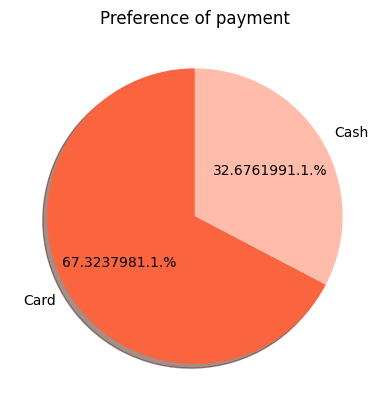

In [212]:
plt.title('Preference of payment')
plt.pie(df['payment_type'].value_counts(normalize=True), labels = df['payment_type'].value_counts().index,
        startangle= 90, shadow=True, autopct='%f1.1.%%',colors =['#FA643F','#FFBCAB'])

In [216]:
passenger_count=df.groupby(['payment_type','passenger_count'])[['passenger_count']].count()
passenger_count.rename(columns={'passenger_count':'count'},inplace =True)
passenger_count.reset_index()


,payment_type,passenger_count,count
0,Card,1,909245
1,Card,2,327661
2,Card,3,122412
3,Card,4,63676
4,Card,5,124045
5,Cash,1,460550
6,Cash,2,155472
7,Cash,3,54506
8,Cash,4,32715
9,Cash,5,47626


In [218]:
passenger_count['perc']=((passenger_count['count'])/(passenger_count['count']).sum())*100

In [220]:
passenger_count

count       perc
payment_type passenger_count                   
Card         1                909245  39.568381
             2                327661  14.259100
             3                122412   5.327106
             4                 63676   2.771042
             5                124045   5.398171
Cash         1                460550  20.042143
             2                155472   6.765806
             3                 54506   2.371984
             4                 32715   1.423686
             5                 47626   2.072581

In [222]:
print(df.columns)

Index(['passenger_count', 'payment_type', 'fare_amount', 'trip_distance',
       'duration'],
      dtype='object')


In [116]:


# Create the DataFrame with specified columns
df = pd.DataFrame(columns=['payment_type', 1, 2, 3, 4, 5])

# Set the 'payment_type' values
df['payment_type'] = ['Card', 'Cash']

# Assign values to the first row (Card)
df.iloc[0, 1:] = passenger_count.iloc[0:5, -1].values

# Assign values to the second row (Cash)
df.iloc[1, 1:] = passenger_count.iloc[5:10, -1].values

# Ensure the number of values being assigned matches the number of columns (1 to 5)


df.iloc[0,1:]= passenger_count.iloc[0:5,-1]:

This is assigning a subset of data to the first row (iloc[0]) of df (which corresponds to the payment type 'Card').
passenger_count.iloc[0:5,-1] extracts the last column (-1 indicates the last column) from the DataFrame passenger_count, selecting the first five rows (0:5).
These extracted values are assigned to the numerical columns 1 to 5 for the 'Card' payment type.
df.iloc[1,1:]= passenger_count.iloc[5:,-1]:

Similarly, this line assigns values to the second row (iloc[1]) of df (which corresponds to the payment type 'Cash').
passenger_count.iloc[5:,-1] selects the last column from passenger_count, starting from the sixth row onward (5:) and assigns those values to the numerical columns 1 to 5 for the 'Cash' payment type.

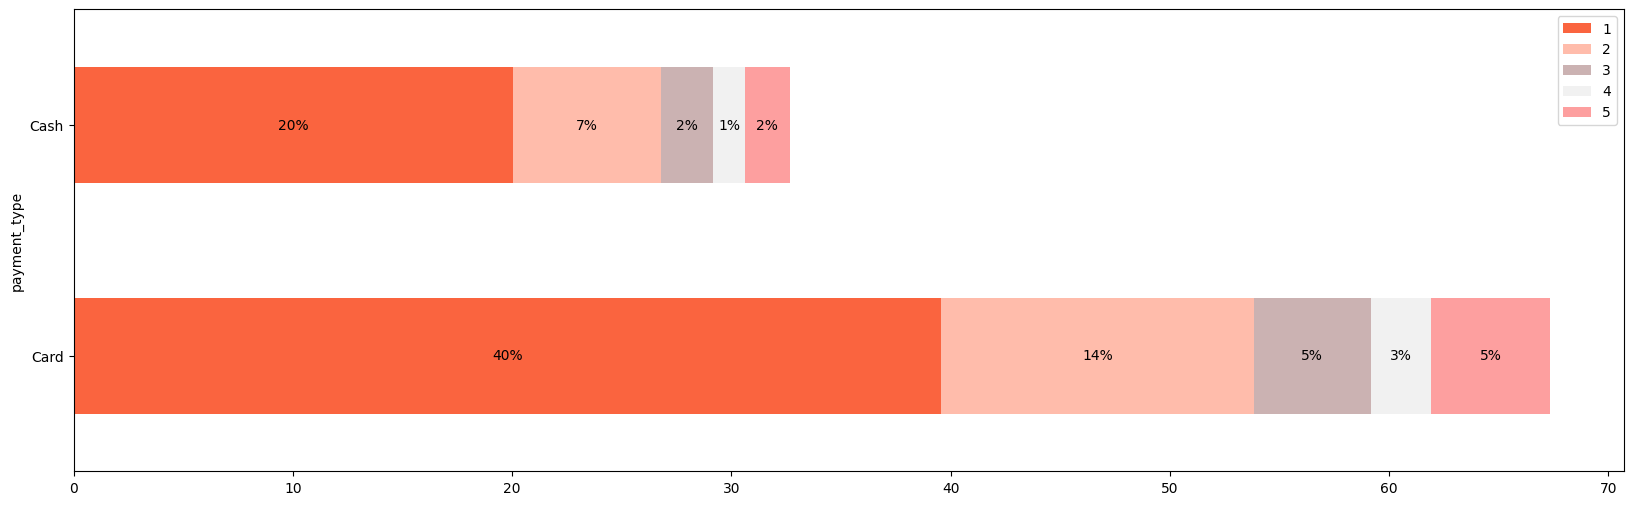

In [118]:
fig, ax = plt.subplots(figsize=(20,6))
df.plot(x='payment_type', kind = 'barh', stacked = True, ax =ax, color = ['#FA643F','#FFBCAB', '#CBB2B2', '#F1F1F1', '#FD9F9F'])

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2 ,
            y + height / 2,
            '{:.0f}%'.format(width),
            horizontalalignment='center',
            verticalalignment='center')

Null Hypothesis: There is no difference between the customer who used card and cash 


Alternate Hypothesis: There is difference between the customer who used card and cash.

Q-Q plot is used to check if the colums is in normal distribution or not

Also as the histogram shows the data is not perfectly shew 

We will use t test

In [224]:
print(df.columns)

Index(['passenger_count', 'payment_type', 'fare_amount', 'trip_distance',
       'duration'],
      dtype='object')


In [226]:
# Sample based on payment type and specific fare column
sample_card = df[df['payment_type'] == 'Card']['fare_amount']
sample_cash = df[df['payment_type'] == 'Cash']['fare_amount']


In [228]:
t_stats, p_value=st.ttest_ind(a= sample_card, b= sample_cash ,equal_var=False)
print('T-statistics',t_stats,'P-value' ,p_value)

T-statistics 169.2111527245052 P-value 0.0


So the null hypothesis is rejected

*Alternate hypothesis:There is difference between the customer who used card and cash.

Recommendations

Encourage customers to pay with credit cards to capitalize on the potential for generating more revenue for taxi cab drivers.

Implement strategies such as offering incentives or discounts for credit card transactions to incentivize customers to choose this payment method.

Provide seamless and secure credit card payment options to enhance customer convenience and encourage adoption of this preferred payment method.